# Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. 

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## 1: Load the Data

In [61]:
# Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN 
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns" , 100)

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Checking the dtype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

## 2: Data cleaning

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

135080 is a significant portion in our data we cant drop all rows with NaN values

In [7]:
# fill missing values
df['Description'] = df['Description'].fillna('Unknown')
df['CustomerID'] = df['CustomerID'].fillna(0)

In [8]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# delete duplicated values
df.duplicated().sum()

5268

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
# drop irrelevant columns

df = df.drop("CustomerID" , axis=1 )

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


## 3: Explore the basic statistics

In [14]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,10.000000,2011-10-18 17:05:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,219.130156,NaN,97.233118


In [36]:
df = df.drop(df[df["Quantity"] < 0].index)
df['InvoiceDateNumeric'] = (df['InvoiceDate'] - df['InvoiceDate'].min()).dt.days

In [15]:
df['Quantity'].median()

3.0

In [16]:
# Top 5 most frequent countries
df['Country'].value_counts().head(5)

Country
United Kingdom    490300
Germany             9480
France              8541
EIRE                8184
Spain               2528
Name: count, dtype: int64

In [17]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [18]:
len(df['Country'].unique())

38

In [19]:
std_dev = df['Quantity'].std()    # Standard deviation
variance = df['Quantity'].var()   # variance
data_range = df['Quantity'].max() - df['Quantity'].min()  # Range

print(f"Standard Deviation: {std_dev}, Variance: {variance}, Range: {data_range}")


Standard Deviation: 219.13015613073304, Variance: 48018.02532587944, Range: 161990


## 4: Data visualization

<Axes: xlabel='InvoiceDate'>

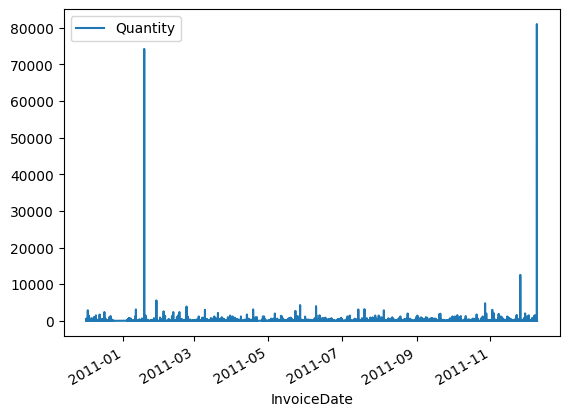

In [41]:
df.plot(x = "InvoiceDate" , y ="Quantity")

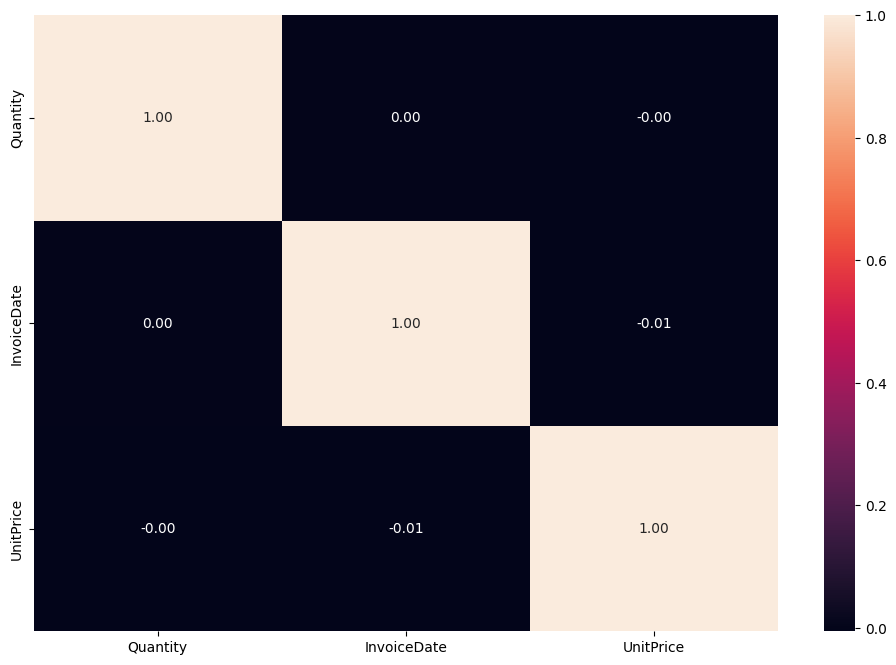

In [35]:
correlation = [i for i in df.columns if df[i].dtype != "object"]
corr = df[correlation].corr()

plt.figure(figsize=(12 , 8))
sns.heatmap(corr , annot= True , fmt= ".2f")
plt.show()

<Figure size 1000x600 with 0 Axes>

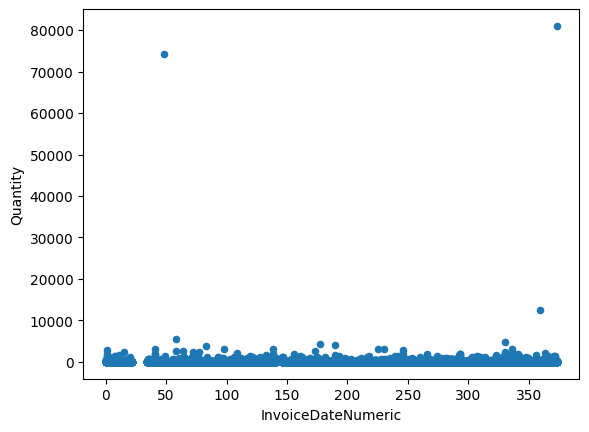

In [40]:
plt.figure(figsize=(10, 6))
df.plot.scatter(x = "InvoiceDateNumeric" , y = "Quantity")
plt.show()

## 5: Analyze the sales trends over time

Most of the data focused on low quantities: The large majority of points lie in the quantity range close to 0, suggesting that for the most part invoices were for relatively small orders.

There are significant outliers:
One point, around 80,000 units, is an extreme outlier.
Another, around 30,000-40,000, is also an outlier.
Such anomalies may be the result of data errors (e.g. mistakes when entering quantities) or actual, unusually large orders.

### Busiest month 

<Axes: xlabel='Quantity', ylabel='Month'>

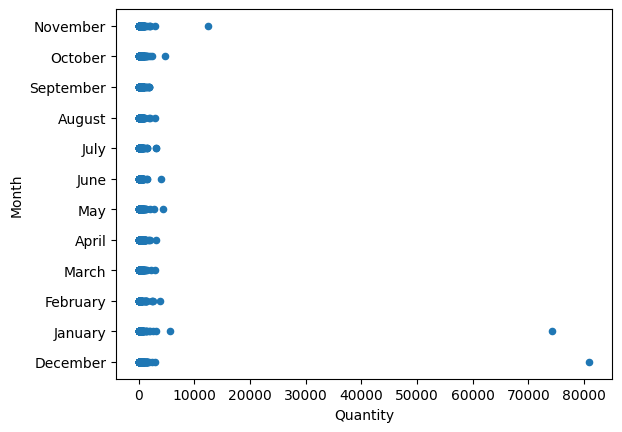

In [49]:
df.plot.scatter("Quantity" , "Month")

In [55]:
# Top 5 busiest month
top5 = df[['Quantity' , "Month"]].groupby("Month")['Quantity'].sum().sort_values(ascending=False).head(5)
top5

Month
November     768468
December     675510
October      626373
September    574169
August       424266
Name: Quantity, dtype: int64

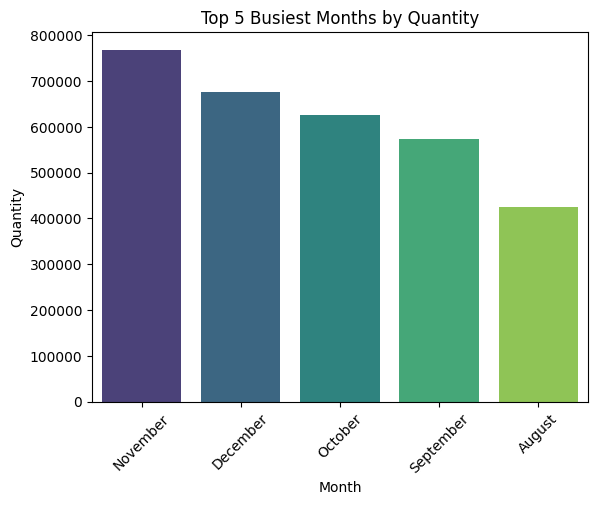

In [62]:
# Convert the Series to a DataFrame
top5_df = top5.reset_index()
top5_df.columns = ["Month", "Quantity"]

# Now you can plot
sns.barplot(data=top5_df, x="Month", y="Quantity", palette="viridis")
plt.title("Top 5 Busiest Months by Quantity")
plt.xticks(rotation=45)
plt.show()


## 6: Explore the top-selling products and countries based on the quantity sold.


#### Best selling products

In [25]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

In [26]:
top_products.info()

<class 'pandas.core.series.Series'>
Index: 4224 entries, WORLD WAR 2 GLIDERS ASSTD DESIGNS to printing smudges/thrown away
Series name: Quantity
Non-Null Count  Dtype
--------------  -----
4224 non-null   int64
dtypes: int64(1)
memory usage: 66.0+ KB


#### Best selling countries

In [27]:
top_country = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
top_country.head()

Country
United Kingdom    4250328
Netherlands        200128
EIRE               142495
Germany            117341
France             110438
Name: Quantity, dtype: int64

#### Visualization

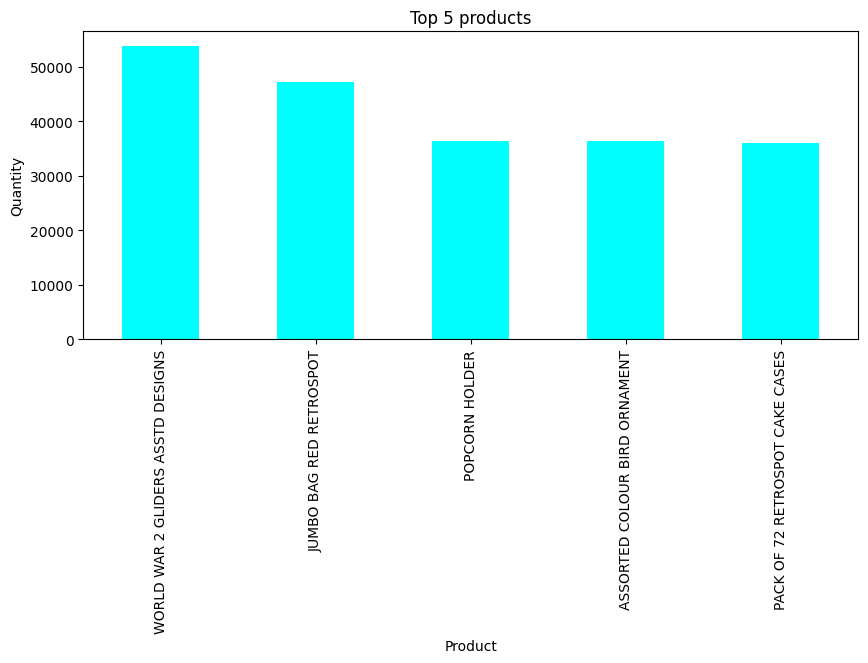

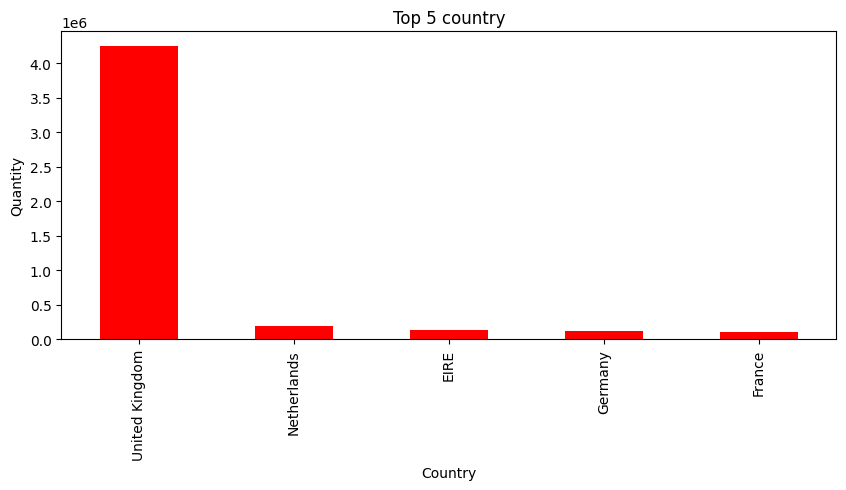

In [28]:
plt.figure(figsize=(10 , 4))
top_products.head().plot(kind= "bar" , color = "aqua")
plt.title("Top 5 products")
plt.xlabel("Product")
plt.ylabel("Quantity")
plt.show()

plt.figure(figsize=(10 ,4))
top_country.head().plot(kind= "bar" , color = "red")
plt.title("Top 5 country")
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.show()

## 7 : Identify any outliers or anomalies in the dataset

<Figure size 1200x600 with 0 Axes>

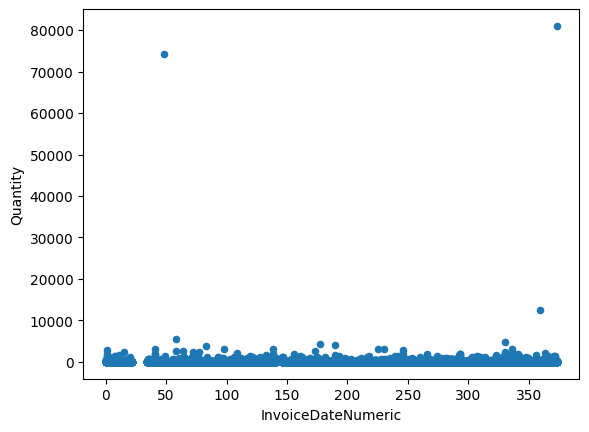

In [66]:
plt.figure(figsize=(12 , 6))
df.plot.scatter(y = "Quantity" ,x = 'InvoiceDateNumeric' )
plt.show()

In [49]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[(df['Quantity'] < lower_limit) | (df['Quantity'] > upper_limit)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,United Kingdom
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,France
44,536370,22492,MINI PAINT SET VINTAGE,36,2010-12-01 08:45:00,0.65,France
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,United Kingdom
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,United Kingdom
...,...,...,...,...,...,...,...
541835,581579,23581,JUMBO BAG PAISLEY PARK,40,2011-12-09 12:19:00,1.79,United Kingdom
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,United Kingdom
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,United Kingdom


In [115]:
upper_limit

26.0

#### Anomlay Detection using DBScan Clustering

In [102]:
db = DBSCAN(eps=0.10)
df["Cluster"] = db.fit_predict(df[['Quantity' , "InvoiceDateNumeric"]])

In [103]:
db.labels_

array([   0,    0,    1, ..., 6233, 6233, 6238], dtype=int64)

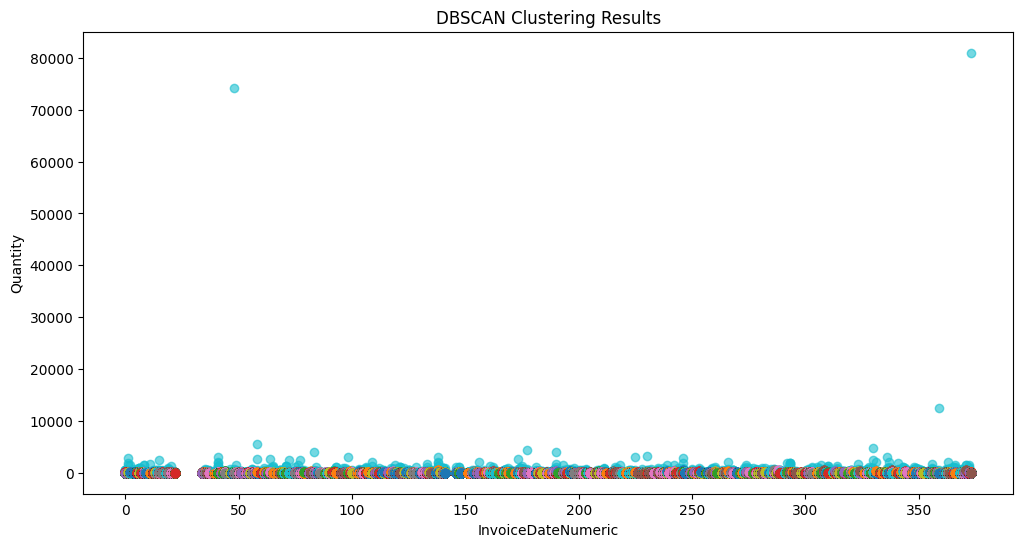

In [105]:
plt.figure(figsize=(12, 6))

# Plot each cluster with a unique color
for cluster_label in df["Cluster"].unique():
    cluster_data = df[df["Cluster"] == cluster_label]
    plt.scatter(
        cluster_data["InvoiceDateNumeric"],
        cluster_data["Quantity"],
        label=f"Cluster {cluster_label}" if cluster_label != -1 else "Noise",
        alpha=0.6
    )

# Plot configuration
plt.xlabel("InvoiceDateNumeric")
plt.ylabel("Quantity")
plt.title("DBSCAN Clustering Results")
plt.show()

### Outlier detection with Local Outlier Factor (LOF)

In [113]:
clf = LocalOutlierFactor(n_neighbors=2 , contamination= 0.10)
df['Outlier']= clf.fit_predict(df[['Quantity' , "InvoiceDateNumeric"]])

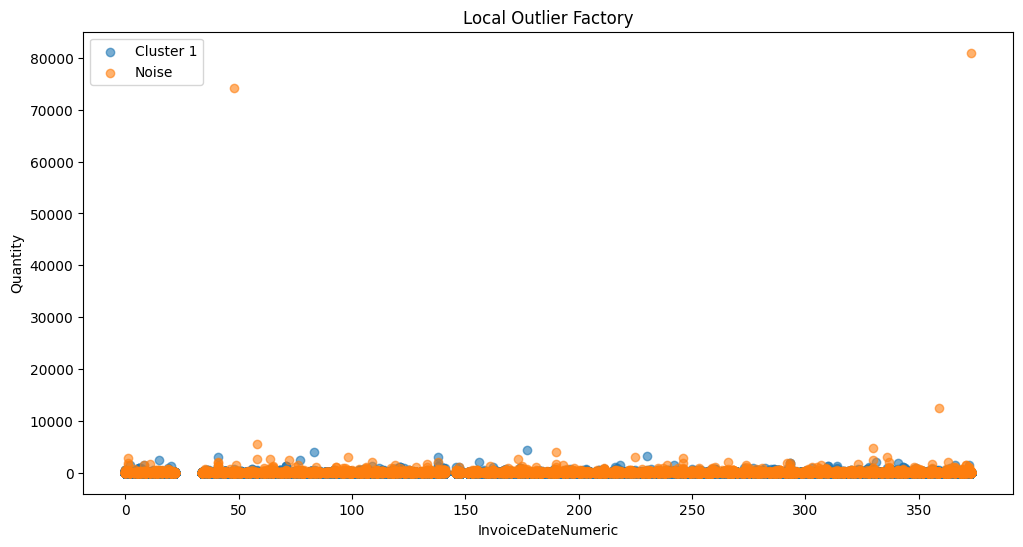

In [114]:
plt.figure(figsize=(12, 6))

# Plot each cluster with a unique color
for cluster_label in df["Outlier"].unique():
    cluster_data = df[df["Outlier"] == cluster_label]
    plt.scatter(
        cluster_data["InvoiceDateNumeric"],
        cluster_data["Quantity"],
        label=f"Cluster {cluster_label}" if cluster_label != -1 else "Noise",
        alpha=0.6
    )

# Plot configuration
plt.xlabel("InvoiceDateNumeric")
plt.ylabel("Quantity")
plt.title("Local Outlier Factory")
plt.legend()
plt.show()

## 8 : Conclusions and summarize your findings

Analysis of the data reveals some key insights and challenges:
1. Seasonality of sales: The busiest months in terms of order volumes are November and December, likely due to the festive period and increased demand during this time.
2. Outliers: There are significant outliers in the data, such as orders of tens of thousands of units, which may be due to data errors or exceptional situations (e.g. bulk orders). These values require further verification.
3. Noise in the data: High variability and dispersion of data affect its reliability. Data cleaning methods, such as removing or correcting outliers, and data aggregation are needed to reduce the impact of noise.
4. No clear trend over time: Apart from a seasonal increase in November and December, there were no clear changes in the number of orders over the year, suggesting a lack of a temporal trend.
5. Recommendations for the future:
    - Cleaning the data of noise and outliers.
    - Segment the data by product category, customer or region for deeper analysis.
    - Visualising data on a monthly basis to better capture seasonal patterns.
    - Analysis of returns and sales forecasting to better prepare for future periods of strong sales.